In [51]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [52]:
cols = ['Age','Op_year','axil_nodes','surv_status']
df = pd.read_csv('C:/Users/UPES/Pictures/internity/haberman.csv', names = cols)
df.head(10)

,Age,Op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [53]:
df.shape

(306, 4)

In [54]:
df.isnull().sum()

Age            0
Op_year        0
axil_nodes     0
surv_status    0
dtype: int64

In [55]:
#no null values

In [56]:
df.describe()

,Age,Op_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_year        306 non-null int64
axil_nodes     306 non-null int64
surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


# Visualization

In [58]:
df['surv_status'] = df['surv_status'].map({1:'survived', 2:'Not survived'})
df.tail()

,Age,Op_year,axil_nodes,surv_status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,Not survived
305,83,58,2,Not survived


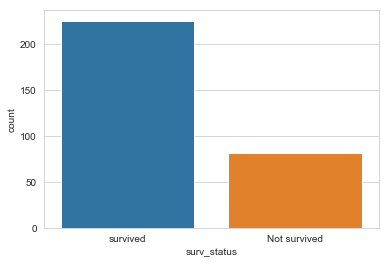

In [59]:
sn.countplot(x= 'surv_status', data = df)

In [60]:
df.columns

Index(['Age', 'Op_year', 'axil_nodes', 'surv_status'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020826F7DD30>,
      dtype=object)

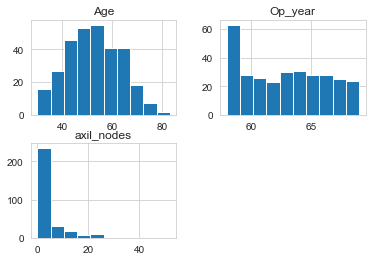

In [61]:
df.hist()

In [62]:
df['surv_status'].value_counts()

survived        225
Not survived     81
Name: surv_status, dtype: int64

In [63]:
df['surv_status'].value_counts()

survived        225
Not survived     81
Name: surv_status, dtype: int64

<BarContainer object of 306 artists>

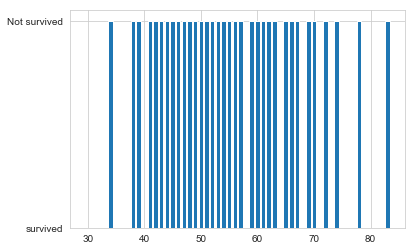

In [64]:
plt.bar(df['Age'], df['surv_status'])
#data is 

In [65]:
#our data is highly mixed up

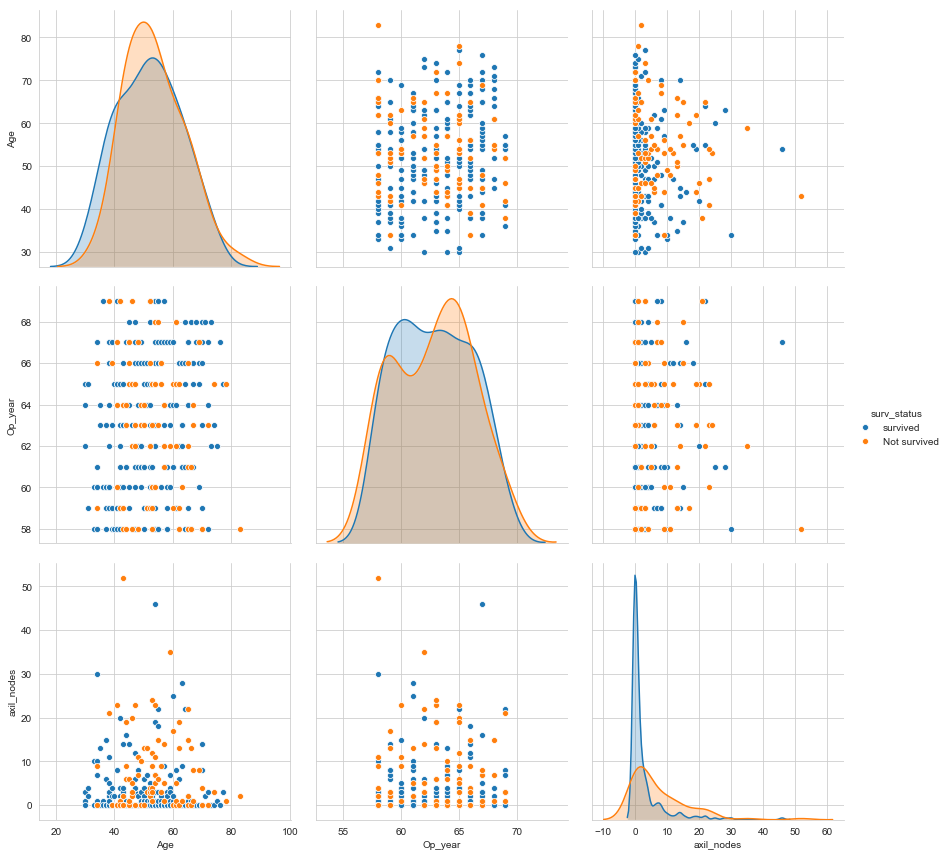

In [66]:
#Plot a pair plot
sn.set_style('whitegrid')
sn.pairplot(df,hue= 'surv_status',height =4)
plt.show()

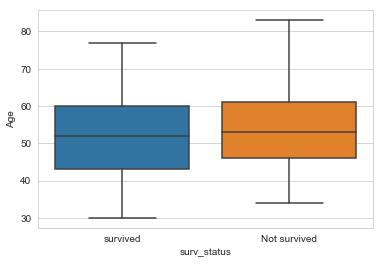

In [67]:
#plot boxplots
sn.boxplot(x= 'surv_status',y='Age', data = df)

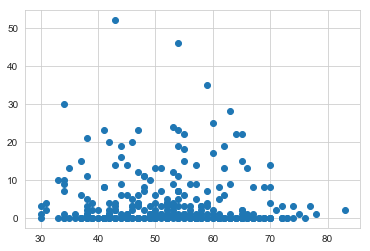

In [68]:
plt.scatter(df['Age'],df['axil_nodes'])

[]

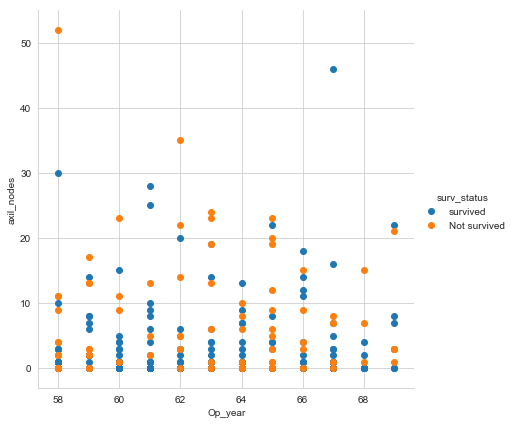

In [69]:
sn.FacetGrid(df, hue ="surv_status",height =6)\
.map(plt.scatter,'Op_year','axil_nodes')\
.add_legend()
plt.plot()

In [70]:
#1. we found that in 1964, most of the operations were not successful
#2. most of the patients that do not survived have 0 axil nodes

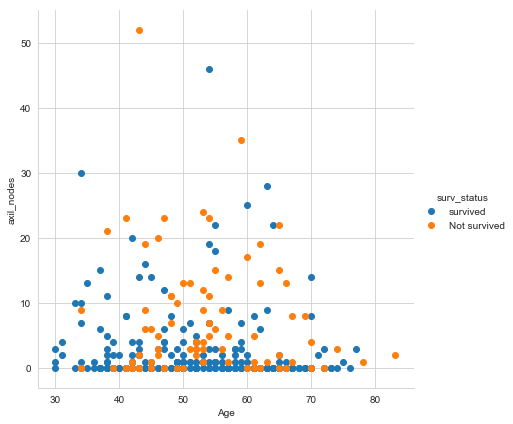

In [71]:
#facet it on survived column with seaborn
sn.FacetGrid(df, hue = "surv_status", height= 6)\
.map(plt.scatter,'Age','axil_nodes')\
.add_legend()
plt.show()

In [72]:
#3. There are very less patients with axile nodes >30 and if there are, they do not survived
#2. Patients with age 40-70 are most likely to die if they have 2-18 axile_nodes 
#3. Patients with 0 axile nodes are most likely to survive irrespective to their age

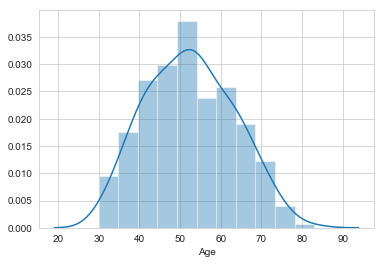

In [73]:
sn.distplot(df['Age'])

[]

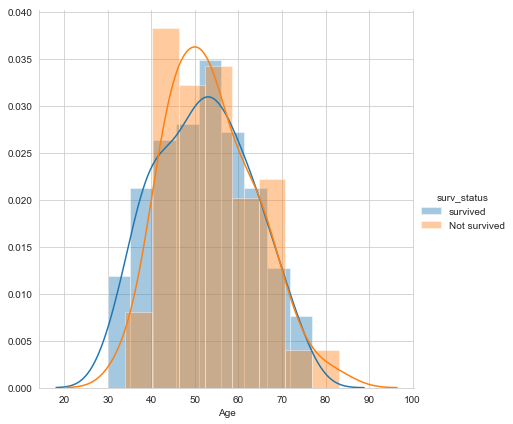

In [74]:
#lets faet it with survival status
sn.FacetGrid(df,hue = 'surv_status', height=6)\
.map(sn.distplot,'Age')\
.add_legend()
plt.plot()

In [75]:
#Patients with age 40-60 do not survived and patients with age less than
# 40 are more likely to survive

[]

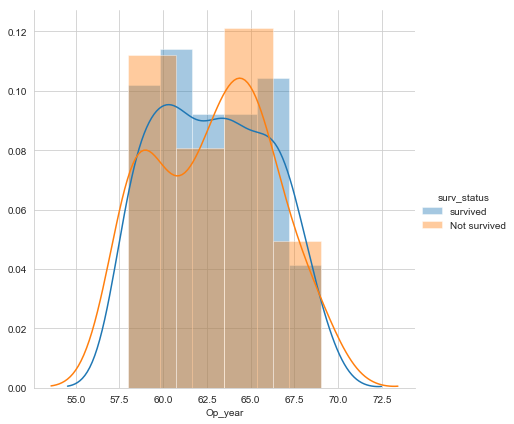

In [76]:
sn.FacetGrid(df,hue ='surv_status',height =6)\
.map(sn.distplot,'Op_year')\
.add_legend()
plt.plot()

In [77]:
#Large no. of patients died in the year 1962-1965